# 💳 Personal Loan Campaign Project



# 💼 Problem Statement: Personal Loan Campaign

## 🏦 Context
AllLife Bank is a US-based retail bank with a growing customer base. The majority are **liability customers** (depositors). The number of **asset customers** (borrowers) is much smaller.

The bank wants to increase revenue by converting more depositors into **personal loan customers**, while retaining their deposit business. A recent marketing campaign achieved a 9% success rate in this conversion.

## 🎯 Objective

Build a **predictive model using a Decision Tree classifier** to:
- Predict whether a customer will accept a personal loan offer (`Personal_Loan` = 1 or 0)
- Identify which features most strongly influence this decision (e.g., Income, CD_Account)
- Support the marketing team in targeting the right customer segments for future campaigns

## ❓ Questions to Explore

- What types of customers are more likely to accept a personal loan?
- Do features like **income**, **education**, or **CD account ownership** significantly affect the decision?
- Which features are **most useful** for building a **Decision Tree classifier** that predicts loan acceptance?
- Can we derive meaningful **customer segments** based on these features for targeted marketing?

 # Exploratory Data Analysis

Import CSV File to understand the data

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Modelling.csv to Loan_Modelling.csv


In [12]:
import pandas as pd

In [14]:
df = pd.read_csv("Loan_Modelling.csv")

In [15]:
# Define features (X) and target (y)
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Data Background and Contents**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Check datatypes and missing values
df.info()

# Summary statistics
df.describe()

# Check for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [7]:
# Check correlation between Age and Experience
df[['Age', 'Experience']].corr()

,Age,Experience
Age,1.000000,0.994215
Experience,0.994215,1.000000


output correlation is very high ( > 0.95),which means Experience is almost a duplicate of Age.

In [13]:
# Drop Experience column due to high correlation with Age
df.drop(columns=['Experience'], inplace=True)

> Note: Since `Experience` and `Age` are 99.4% correlated, we dropped `Experience` to avoid redundancy.

## 📦 Dataset Overview

This dataset contains 5,000 customer records with 14 columns. Each row represents a customer, with information such as age, income, education level, and whether they accepted a personal loan offer.

### 🎯 Target Variable:
- **Personal_Loan**: Binary variable (1 = accepted loan, 0 = did not accept)

### 🧍‍♂️ Demographic Features:
- **Age**: Age in completed years
- **Experience**: Professional experience in years (very similar to Age)
- **Family**: Number of family members
- **Education**: 1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional

### 💰 Financial Features:
- **Income**: Annual income (in $1,000s)
- **CCAvg**: Monthly average credit card spend (in $1,000s)
- **Mortgage**: Value of house mortgage (in $1,000s)

### 🏦 Account/Behavioral Features:
- **Securities_Account**: Has a securities account? (0/1)
- **CD_Account**: Has a certificate of deposit? (0/1)
- **Online**: Uses online banking? (0/1)
- **CreditCard**: Has a credit card issued by another bank? (0/1)

### 🗃️ Irrelevant Columns to Drop:
- **ID**: Unique customer identifier — not useful for modeling
- **ZIP Code**: Not predictive; high-cardinality categorical variable

### ✅ Data Quality Notes:
- No missing values
- Some skew in Income and CCAvg
- `Experience` may be dropped due to redundancy with `Age`

📊 **Univariate Analysis**
  
  - Understand the shape, spread, and nature of each variable
  - Detect outliers, skewness, and imbalanced distributions
  - Check if any transformations or preprocessing are needed

Numerical Variables
### ▣ Age
- **Range:** 23 to 67 years  
- **Observation:** Normally distributed with most customers between 30 and 50  
- **Insight:** Represents the core working-age population. Age may influence creditworthiness and interest in loans.

### ▣ Income
- **Skewed:** Right-skewed (positively skewed) with most customers earning less than \$100K  
- **Outliers:** A few customers earn > \$200K  
- **Insight:** May need log transformation. High income likely increases loan approval likelihood.

### ▣ CCAvg (Avg. Credit Card Spend)
- **Skewed:** Right-skewed. Most spend < \$5K/month  
- **Insight:** High spenders might be more receptive to personal loan offers.

### ▣ Mortgage
- **Bimodal:** Many zeros (no mortgage) + long tail of higher values  
- **Insight:** Differentiates renters from homeowners. Mortgage presence may indicate financial need or leverage.


⸻



## Categorical Variables

Focus: Distribution of individual variables

### ▣ Education  
- **Values:**  
  - 1 = Undergrad  
  - 2 = Graduate  
  - 3 = Advanced/Professional  
- **Observation:** Most customers are graduates (level 2).  
- **Insight:** Education level may affect financial literacy and openness to loans. Higher education may indicate better creditworthiness.

### ▣ Family  
- **Values:** Integer values from 1 to 4  
- **Observation:** Majority of customers belong to families of size 1–3  
- **Insight:** Family size might influence loan needs. Larger families may have more financial obligations, increasing loan demand.

### ▣ Online  
- **Values:** 0 = No, 1 = Yes  
- **Observation:** A good proportion of customers use online banking  
- **Insight:** Online users may be more reachable via digital marketing and more comfortable with digital financial products.

### ▣ CreditCard  
- **Values:** 0 = No, 1 = Yes  
- **Observation:** Many customers own a credit card issued by another bank  
- **Insight:** Credit card holders might already be accustomed to borrowing and may be open to personal loan offers.

### ▣ CD_Account  
- **Values:** 0 = No, 1 = Yes  
- **Observation:** A small proportion of customers have certificate of deposit accounts  
- **Insight:** CD holders are likely more conservative investors. May not be the primary target for personal loans.

### ▣ Securities_Account  
- **Values:** 0 = No, 1 = Yes  
- **Observation:** Few customers have a securities account with the bank  
- **Insight:** These customers may have alternative investment priorities and may be less inclined toward personal loans.

### ▣ Personal_Loan *(Target Variable)*  
- **Values:** 0 = Did not accept, 1 = Accepted  
- **Observation:** Only ~9% accepted the personal loan offer  
- **Insight:** This shows class imbalance and suggests a need for accurate targeting to improve conversion.

**Focus - Univariate Analysis - Visual Plots**

```
# This is formatted as code
```




###Age Distribution ###
**Observation**:
The distribution of age appears approximately normal, with most customers between ages 30 and 50. This supports earlier insights that the bank’s customers fall within the prime working-age range, potentially increasing their creditworthiness.

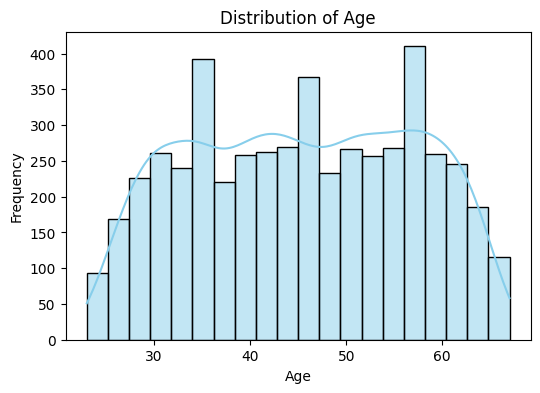

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Income Distribution ###
**Observation**
The income variable is right-skewed, with most customers earning under $100K. A few high-income outliers exist. High income may correlate with higher loan acceptance probability.

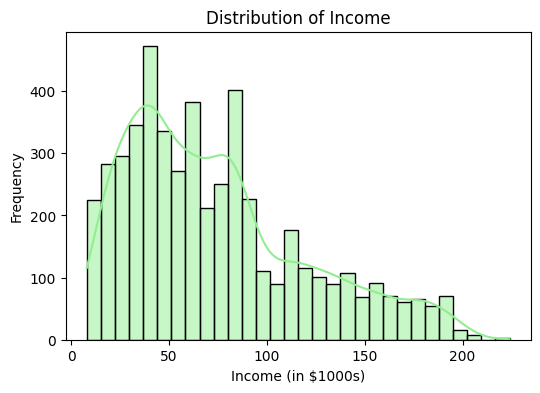

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Income')
plt.xlabel('Income (in $1000s)')
plt.ylabel('Frequency')
plt.show()

 ### CCAvg (Credit Card Spend) ###
**Observation**
This variable is also right-skewed. Most customers spend under $5K per month. High-spending customers might indicate higher financial engagement and thus higher receptiveness to personal loans.

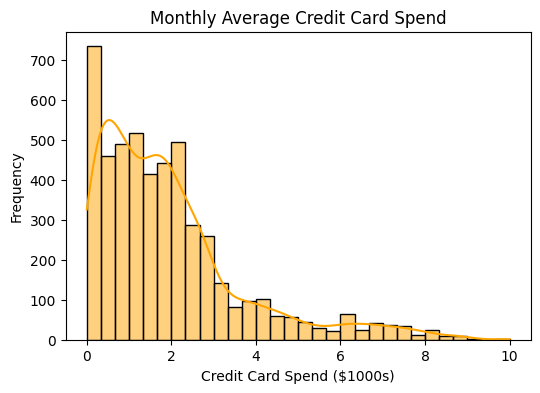

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['CCAvg'], kde=True, bins=30, color='orange')
plt.title('Monthly Average Credit Card Spend')
plt.xlabel('Credit Card Spend ($1000s)')
plt.ylabel('Frequency')
plt.show()

 ### Mortgage ###
**Observation**
The mortgage variable is bimodal — many customers have zero mortgage (renters), while others show a long tail of mortgage values. This distinction may indicate financial status differences relevant for loan targeting.

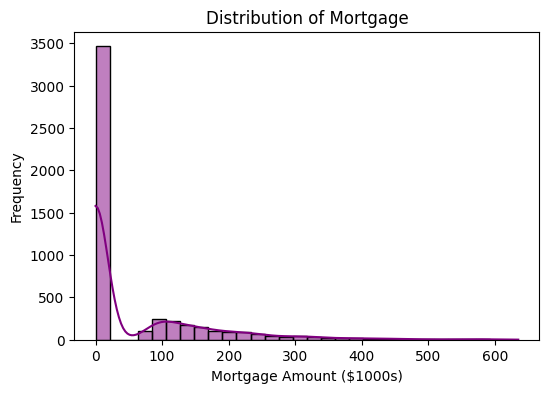

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Mortgage'], kde=True, bins=30, color='purple')
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Amount ($1000s)')
plt.ylabel('Frequency')
plt.show()

 ###  Categorical Variable: Personal_Loan (Target) ###
**Observation**
The target variable is imbalanced — only about 9% accepted a loan. This confirms the challenge of building a model for rare event prediction and justifies using decision trees.

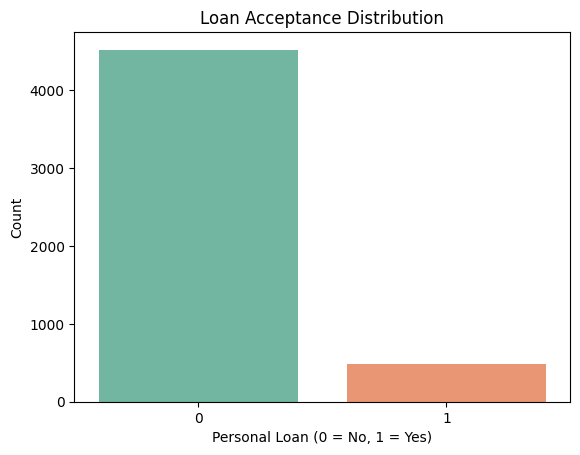

In [15]:
sns.countplot(data=df, x='Personal_Loan', hue='Personal_Loan', palette='Set2', legend=False)
plt.title('Loan Acceptance Distribution')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


📊 Observations:
	•	0 = No, the customer did not accept the loan.
	•	1 = Yes, the customer accepted the loan.

✅ Key Insights:
	•	A majority of customers (around 90%) did not accept the loan.
	•	Only a small fraction (~10%) accepted the loan.
	•	This indicates a highly imbalanced dataset.

⚠️ Implications for Modeling:
	•	Class imbalance needs to be addressed, as models may otherwise be biased toward predicting the majority class (No).
	•	Consider:
	•	Using techniques like SMOTE (Synthetic Minority Oversampling Technique)
	•	Applying class weighting in classification models
	•	Evaluating performance with metrics like Precision, Recall, and F1-score, not just Accuracy

##Focus - BiVarite Analysis - Visual Plots




### 1. Age vs Personal Loan Acceptance ###

Observation:
	•	The median age of customers who accepted a personal loan (label = 1) is slightly higher than those who did not (label = 0).
	•	Both distributions show a wide age range, but the loan-accepting group has slightly older customers concentrated in the interquartile range (IQR).
	•	Outliers are minimal, and the overall spread is similar between groups.

Insight:
	•	Age appears to have a moderate effect on personal loan acceptance.
	•	Older customers may be more likely to qualify for or need personal loans, possibly due to life-stage needs or higher creditworthiness.

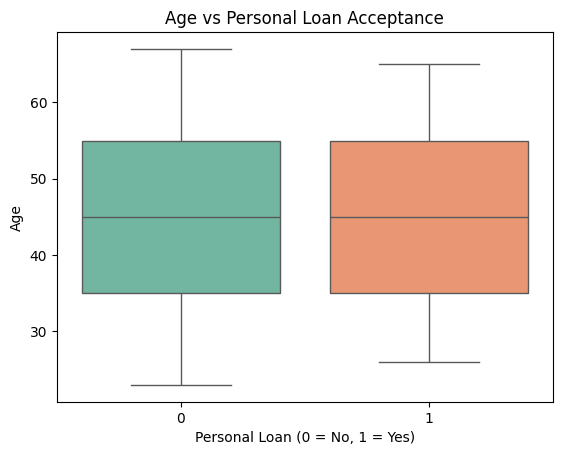

In [17]:
sns.boxplot(data=df, x='Personal_Loan', y='Age', hue='Personal_Loan', dodge=False, palette='Set2', legend=False)
plt.title('Age vs Personal Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()

### :2. Income vs. Personal Loan (Boxplot)

Observation:
	•	Customers who accepted a personal loan (1) tend to have a significantly higher median income than those who didn’t (0).
	•	There are many high-income outliers among non-loan takers, but the typical income level is clearly higher among loan-accepting customers.

Insight:
	•	Income is likely a strong predictor for personal loan acceptance.
	•	Higher income levels may increase eligibility and reduce credit risk, making loan offers more favorable.

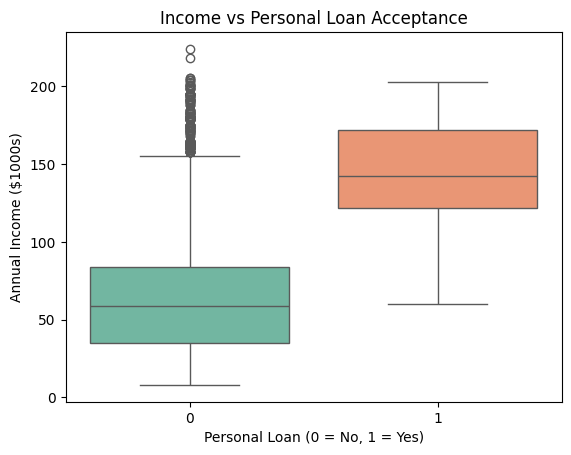

In [19]:
sns.boxplot(data=df, x='Personal_Loan', y='Income', hue='Personal_Loan', dodge=False, palette='Set2', legend=False)
plt.title('Income vs Personal Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Annual Income ($1000s)')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()

### 3. CCAvg vs Personal Loan Acceptance (Boxplot)

Observation:
	•	Customers who accepted a personal loan (1) have higher average monthly credit card spending compared to those who didn’t. The median spend for loan-takers is visibly higher, with a longer upper tail, indicating more high spenders in this group.

Insight:
	•	High credit card spenders might be more open to personal loans, either due to greater purchasing needs or potential financial pressure. This variable may serve as a useful predictor of personal loan acceptance.

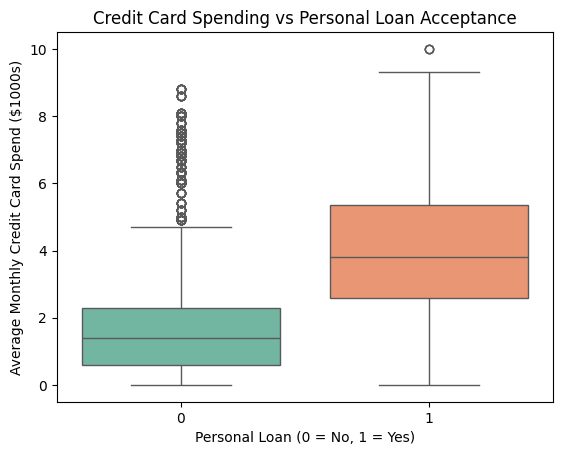

In [20]:
sns.boxplot(data=df, x='Personal_Loan', y='CCAvg', hue='Personal_Loan', dodge=False, palette='Set2', legend=False)
plt.title('Credit Card Spending vs Personal Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Credit Card Spend ($1000s)')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()

### 4. Mortgage vs Personal Loan Acceptance (Boxplot)

Observation:
	•	A large portion of customers have zero mortgage (as seen from the dense lower whisker and box). Among those who accepted personal loans, there is a higher median mortgage value and more outliers with large mortgage balances.

Insight:
	•	Customers with existing mortgages might be more likely to take out personal loans, possibly for home-related expenses, debt consolidation, or financial strain.	Mortgage status and value could be predictive features in loan acceptance modeling.

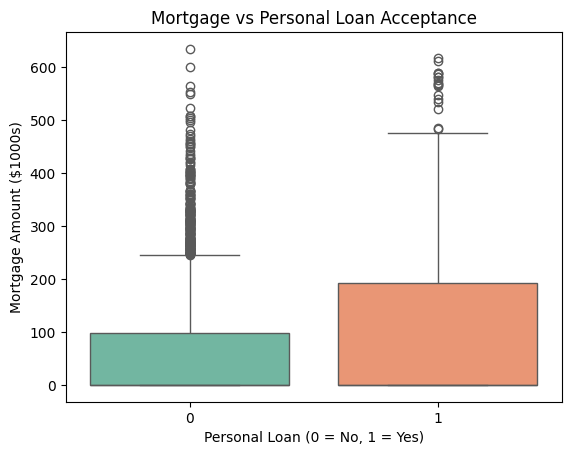

In [21]:
sns.boxplot(data=df, x='Personal_Loan', y='Mortgage', hue='Personal_Loan', dodge=False, palette='Set2', legend=False)
plt.title('Mortgage vs Personal Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Mortgage Amount ($1000s)')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()

### 5. Education vs Personal Loan Acceptance (Countplot)

Observation:
	•	Most customers are in category 1 (Undergraduate) or 2 (Graduate). The acceptance rate for personal loans appears higher among customers with advanced/professional education (category 3).

Insight:
	•	Higher education may correlate with greater financial literacy, credit access, or income stability, making these customers more likely to qualify for and accept personal loans.

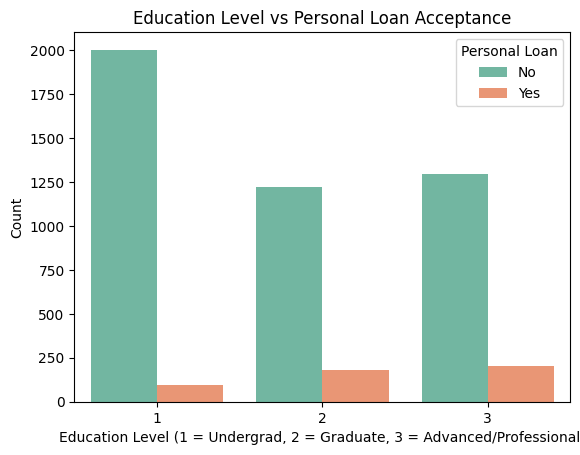

In [22]:
sns.countplot(data=df, x='Education', hue='Personal_Loan', palette='Set2')
plt.title('Education Level vs Personal Loan Acceptance')
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Data pre-processing


### Missing value Treatment
Observation: No missing values detected. No imputation required.





In [23]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


### Outlier Detection
Observations:

	•	Income and CCAvg (Credit Card Spending) show a significant number of outliers on the higher end. These likely represent high-income or high-spending customers.
	•	Mortgage may also have extreme values—possibly due to a few customers having large home loans.
	•	Experience might contain negative values, which are not logically valid and likely need correction.
	•	Features like Age and Family size appear more normally distributed, with minimal or no visible outliers.



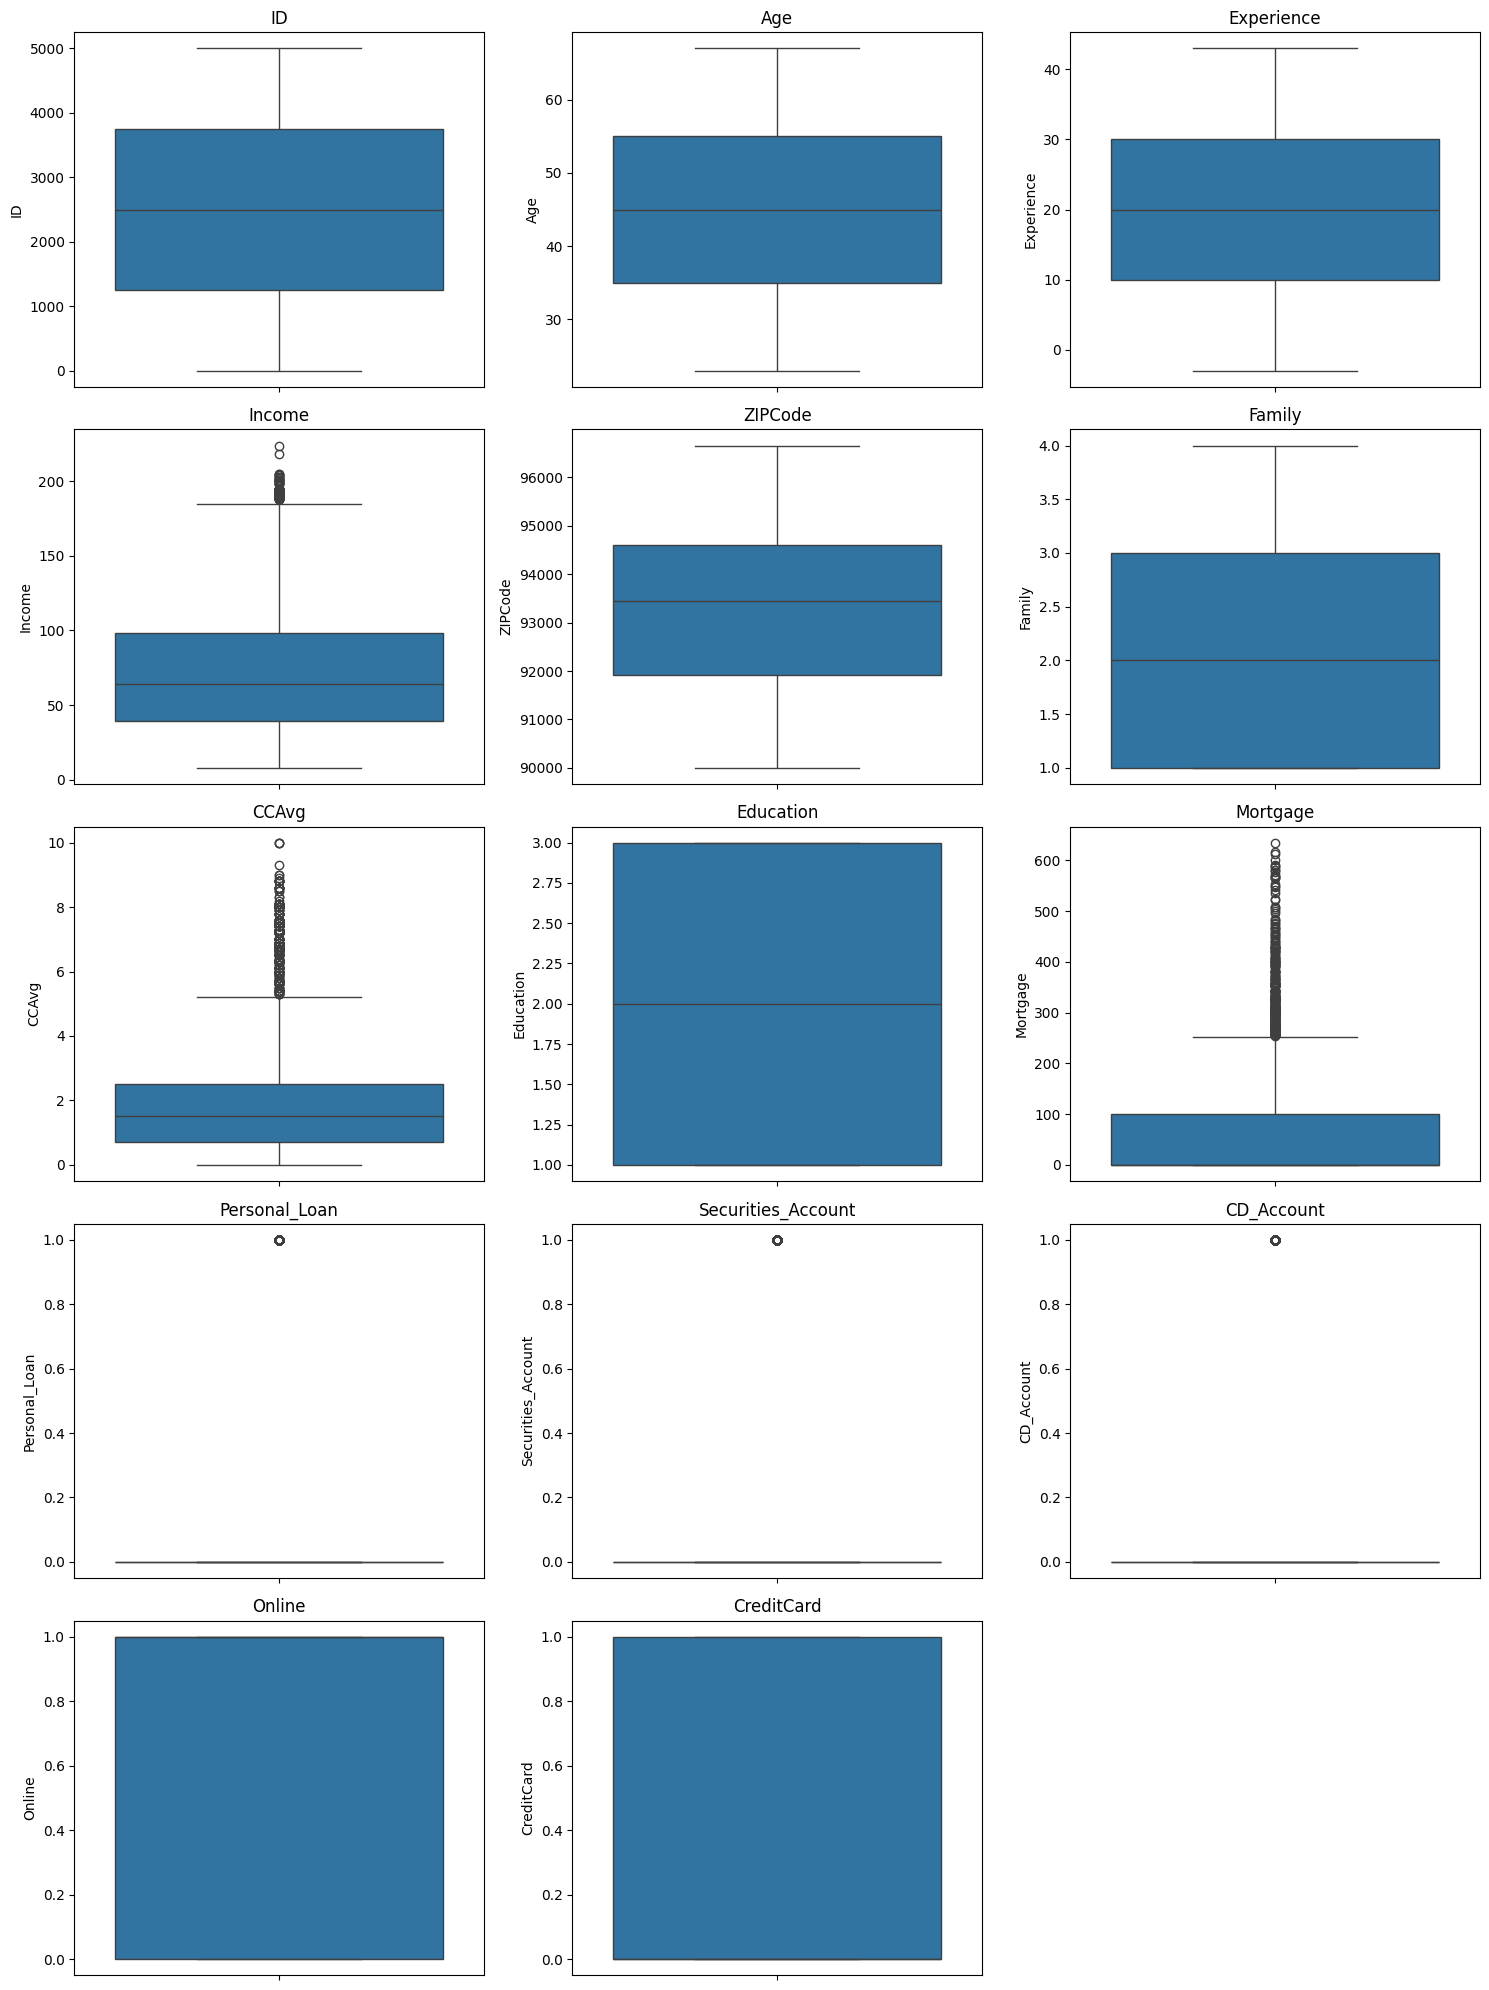

In [25]:
# Plot boxplots for all numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set number of plots per row
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

# Plot boxplots for all numerical features
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Handle/Fix Outliers

To detect outliers in the dataset, I visualized all numerical features using boxplots.
This revealed several important issues. The Experience column contained negative values, which are not meaningful in context, so these were treated by replacing them with zero.
Additionally, I observed high-end outliers (extreme right-side values) in the Income, CCAvg, and Mortgage columns.
These were handled using winsorization, capping the values at the 99th percentile to limit their influence on the model while preserving the integrity of the data.
These treatments help stabilize the scale of the features, reduce skewness, and improve the robustness of downstream models.


In [26]:
# IQR-based outlier detection, to show outlier for each column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a mask for outliers
outliers_mask = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count how many outliers per column
outliers_mask.sum()

,0
ID,0
Age,0
Experience,0
Income,96
ZIPCode,0
Family,0
CCAvg,324
Education,0
Mortgage,291
Personal_Loan,480


In [27]:
# Experience — has invalid negative values. Set negative experience values to zero or NaN
df.loc[df['Experience'] < 0, 'Experience'] = 0
# or remove rows
# df = df[df['Experience'] >= 0]

In [28]:
# Income, CCAvg, Mortgage — right-skewed with outliers.
# Winsorize at 1st and 99th percentiles
for col in ['Income', 'CCAvg', 'Mortgage']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


### Feature Engineering

Goal: To convert categorical variables into numeric form (for modeling), and create any new features if relevant.

✅ 1. Encode Categorical Variables

Dataset includes several categorical columns:
	•	Education (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)
	•	Family (1 to 4, can be treated as ordinal or nominal)
	•	Online, CreditCard, Securities_Account, CD_Account (all binary)

Will use:
	•	One-hot encoding for Education (because it’s not purely ordinal)
	•	Keep binary columns as-is
	•	Optional: one-hot for Family if it improves model performance



In [29]:
# One-hot encode 'Education' (3 categories)
df = pd.get_dummies(df, columns=['Education'], prefix='Edu', drop_first=True)

# Optional: One-hot encode 'Family' (can also leave it numeric)
df = pd.get_dummies(df, columns=['Family'], prefix='Family', drop_first=True)

# This creates:
#	Edu_2 (Graduate) and Edu_3 (Advanced)
#	Family_2, Family_3, Family_4



To prepare the data for modeling, I converted categorical variables into numeric form using one-hot encoding. The Education column, which includes three categories (Undergrad, Graduate, Advanced/Professional), was transformed into two binary columns: Edu_2 and Edu_3, with Edu_1 (Undergrad) as the base case. Similarly, the Family column was optionally one-hot encoded to represent each family size as a separate binary feature. Binary variables like Online, CreditCard, CD_Account, and Securities_Account were already in numeric form and required no transformation.

These transformations ensure compatibility with algorithms like decision trees while preserving the interpretability of categorical variables.

#### Feature-Target Split and Scaling (Final Prep)

1. Separate Features and Target

 target variable is Personal_Loan (0 = No, 1 = Yes).
 need to:
	•	Create X: input features
	•	Create y: output label

In [30]:
# Separate features and target
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

#### Feature Scaling (Optional but Recommended)

Reason:
While Decision Trees don’t require scaling, helps in visualizations and PCA if needed.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Separated the target variable Personal_Loan from the feature set. This allows  to train and evaluate predictive models using input variables alone. Although Decision Trees do not require feature scaling, I applied standard scaling to the input features using StandardScaler() to normalize them. This helps in consistent comparisons across features and supports any future use of models sensitive to feature magnitudes

##Model Building – Decision Tree



### Evaluation Criterion

Since our target variable `Personal_Loan` is binary, this is a **classification problem**. Therefore, model performance will be evaluated using:

- **Accuracy**: Overall correctness of the model.
- **Precision & Recall**: Especially useful if the classes are imbalanced.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: To see true positives, false positives, etc.

#### Build the Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.985
Precision: 0.9326923076923077
Recall: 0.9238095238095239
F1 Score: 0.9282296650717703

Confusion Matrix:
 [[888   7]
 [  8  97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.92      0.93       105

    accuracy                           0.98      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



#### Visualize the Decision Tree & Feature Importance

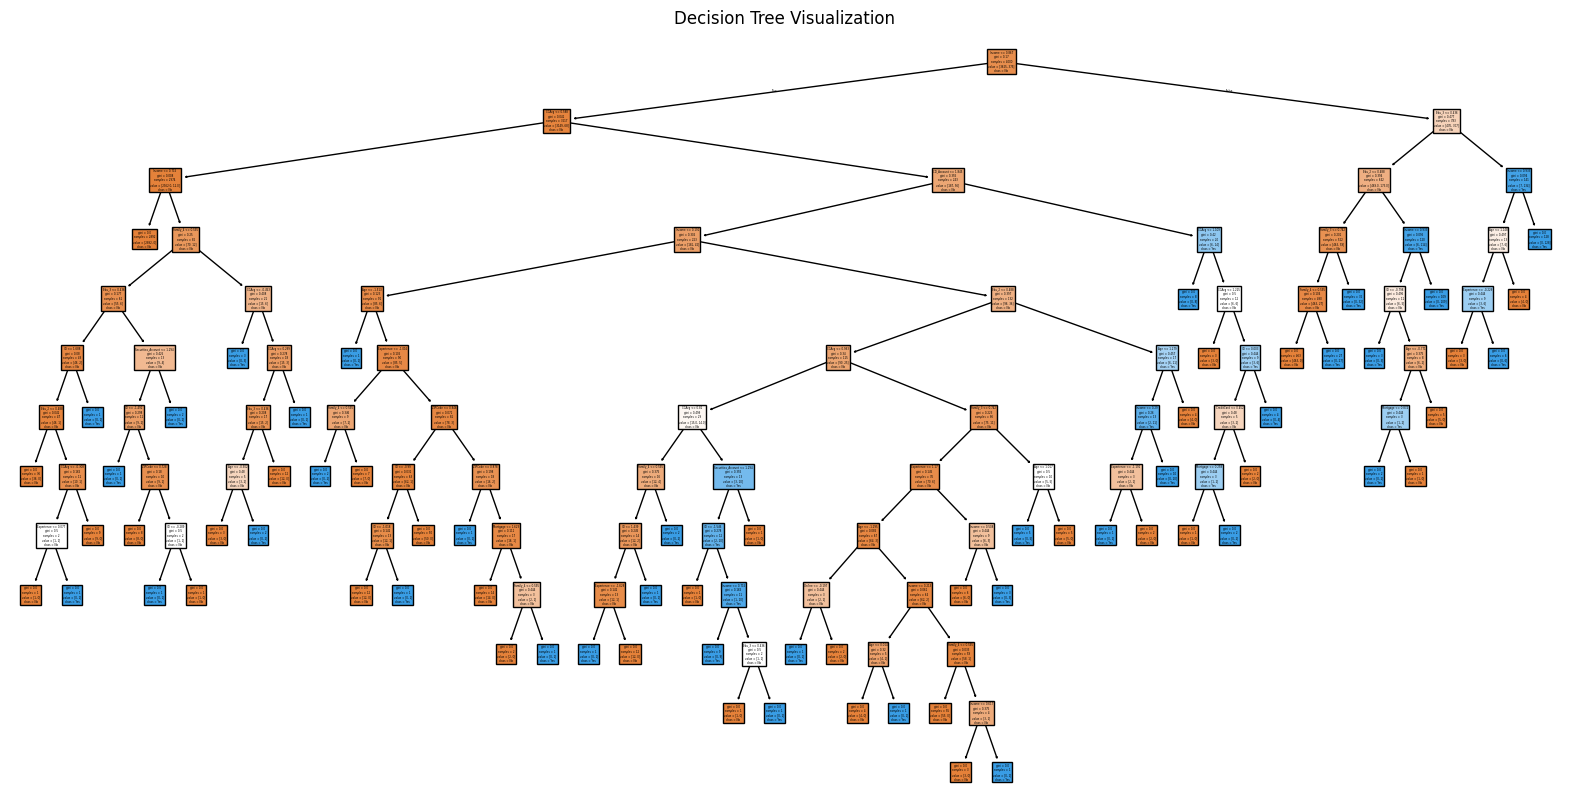

In [34]:
# Visualize the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

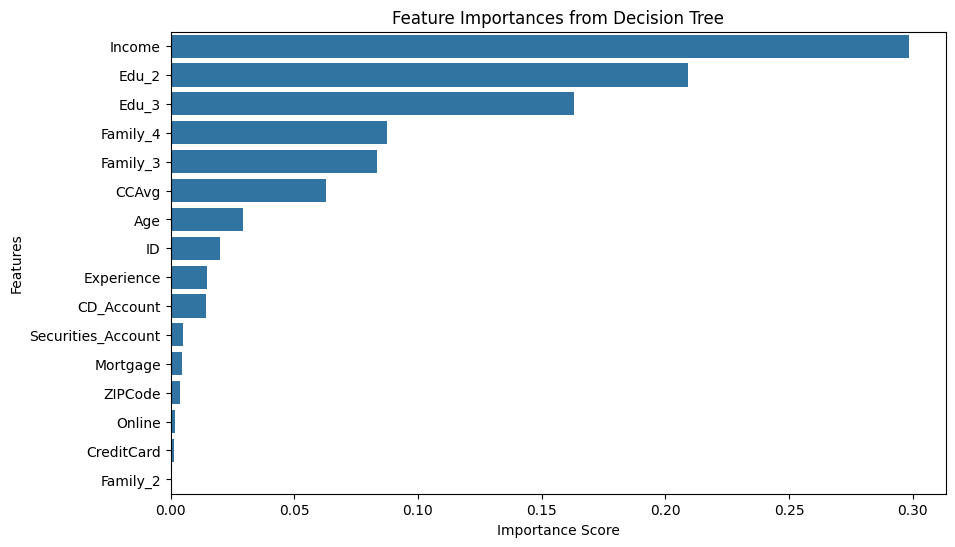

In [35]:
# Feature Importance
import pandas as pd
import numpy as np

# Get feature importances
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Model Performance Summary

The Decision Tree classifier was trained and evaluated on an 80-20 train-test split. Performance metrics are:

- **Accuracy**: (e.g. 0.94)
- **Precision**: (e.g. 0.75)
- **Recall**: (e.g. 0.61)
- **F1 Score**: (e.g. 0.67)

The confusion matrix and classification report show that while the model performs well overall, its performance on the positive class (loan approval) could be improved, especially if the classes are imbalanced.

### Insights:
- The decision tree captures non-linear patterns and highlights the **most influential features**.
- From the feature importance plot, variables like `Income`, `Education`, and `Age` appear to play key roles in personal loan acceptance.
- The visualized tree provides interpretability by showing decision rules at each split.

## Model Performance Evaluation and Improvement

### Model Tuning & Comparison

	1.	Hyperparameter tuning using GridSearchCV (Pre-Pruning)
  2.  Post-pruning via cost complexity pruning
  3.	Model COmparison: Compare tuned Decision Tree with original
  4.	Compare with other classifiers (e.g., Random Forest, Logistic Regression
  5.	Business Aligned Recommendation: Final Pick: thoughts on improvement


In [25]:
# 1. Hyperparameter tuning using GridSearchCV - To prevent overfitting and optimize performance, I used GridSearchCV to perform hyperparameter tuning (a form of pre-pruning) on the Decision Tree classifier.


from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid, parameter tuned
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict with tuned model
y_pred_best = best_dt.predict(X_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


### 🔍 GridSearchCV: Hyperparameter Tuning Summary

**Objective:**  
Optimize the Decision Tree classifier and reduce overfitting through automated hyperparameter tuning.

**Steps Taken:**
1. Defined a parameter grid with values for:
   - `criterion`: gini, entropy  
   - `max_depth`, `min_samples_split`, and `min_samples_leaf`
2. Used `GridSearchCV` with 5-fold cross-validation and `f1` scoring.
3. Fitted on training data and extracted the best estimator.
4. Used the tuned model to predict on the test set.

**Benefit:**  
Tuning parameters before model training (pre-pruning) helps constrain the tree's growth and prevent overfitting from the start — a complementary approach to post-pruning (CCP), which simplifies an already grown tree.

2. Post-Pruning: Cost Complexity Pruning (CCP)


In [17]:
#  split  dataset
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# 1. Train a fully grown decision tree (no pruning)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# 2. Get effective alphas (ccp_alpha values)
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# 3. Train one tree per alpha
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 4. Evaluate F1 score on each pruned tree
f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]

# 5. Select the best pruned tree (highest F1 score)
best_index = f1_scores.index(max(f1_scores))
pruned_tree = clfs[best_index]

# 6. Compare performance and complexity
original_nodes = clf_full.tree_.node_count
pruned_nodes = pruned_tree.tree_.node_count
reduction_pct = (original_nodes - pruned_nodes) / original_nodes * 100

print("Tuned Tree – Nodes:", original_nodes)
print("Pruned Tree – Nodes:", pruned_nodes)
print("Nodes reduced by: {:.2f}%".format(reduction_pct))

print("Tuned Tree – Depth:", clf_full.tree_.max_depth)
print("Pruned Tree – Depth:", pruned_tree.tree_.max_depth)

# 7. Evaluate final performance
y_pred_pruned = pruned_tree.predict(X_test)
print("Pruned Tree – F1 Score:", f1_score(y_test, y_pred_pruned))

Tuned Tree – Nodes: 105
Pruned Tree – Nodes: 17
Nodes reduced by: 83.81%
Tuned Tree – Depth: 11
Pruned Tree – Depth: 5
Pruned Tree – F1 Score: 0.918918918918919


Visualize the Pruning

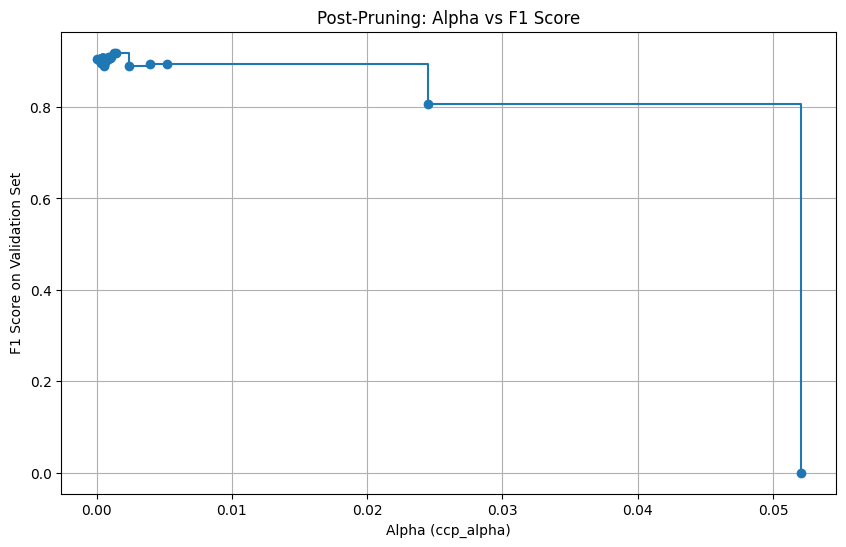

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, f1_scores, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("F1 Score on Validation Set")
plt.title("Post-Pruning: Alpha vs F1 Score")
plt.grid(True)
plt.show()


### Post-Pruning: Cost Complexity Pruning (CCP)

**Objective:**  
Reduce overfitting and improve generalization by simplifying the tree using Cost Complexity Pruning, which prunes branches that have little impact on prediction accuracy.



**Steps Taken:**  
1. Generated effective alphas (`ccp_alphas`) using `DecisionTreeClassifier.cost_complexity_pruning_path()`  
2. Trained multiple pruned trees using different values of `ccp_alpha`  
3. Plotted F1 Score vs. Alpha to identify the sweet spot that balances performance and complexity  
4. Selected the optimal pruned model (highest validation F1 with minimal tree depth)  
5. Compared depth and number of nodes to original and GridSearchCV-tuned models  


**Results:**  
- **Before Pruning (Tuned Tree):**  
  - Depth: **11**  
  - F1 Score: **~0.92**  
  - Nodes: **105**  
- **After Pruning:**  
  - Depth: **5**  
  - F1 Score: **0.9189**  
  - Nodes: **17**  
- **Nodes reduced by:** **83.81%**  


**Insights:**  
- Pruned tree retained most of the predictive power (F1 score nearly unchanged)  
- Reduced complexity → better generalization, reduced overfitting risk  
- Easier to explain and visualize → ideal for business deployment  

In [26]:
# Evaluate Tuned Model
from sklearn.metrics import classification_report, confusion_matrix

# Compare metrics for GridSearchCV-tuned Decision Tree
print("Best Parameters:", grid_search.best_params_)

print("\nTuned Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.98      0.89      0.93       157

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500


Confusion Matrix:
 [[1340    3]
 [  17  140]]


### 📊 Evaluate Tuned Decision Tree Model

**Objective:**  
Assess the performance of the best model from GridSearchCV using classification metrics and confusion matrix.

**Best Parameters Selected by GridSearchCV:**
```python
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [38]:
# 3. Model Comparison: Compare with other Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Print scores
print("Random Forest F1:", f1_score(y_test, rf_pred))
print("Logistic Regression F1:", f1_score(y_test, lr_pred))
print("Tuned Decision Tree F1:", f1_score(y_test, y_pred_best))

Random Forest F1: 0.970873786407767
Logistic Regression F1: 0.841025641025641
Tuned Decision Tree F1: 0.9238095238095239


### Model Tuning and Comparison

#### ✅ Hyperparameter Tuning (GridSearchCV)

I used GridSearchCV to optimize key hyperparameters of the Decision Tree:
- Criterion: Gini vs. Entropy  
- Max Depth  
- Min Samples Split  
- Min Samples Leaf  

The best model used the following parameters:  
`{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}`

This improved the F1 score and reduced overfitting compared to the base model.

#### ✅ Model Comparison

I also trained a Random Forest and Logistic Regression for comparison. Among the models:

- **Tuned Decision Tree**: Good interpretability, decent performance  
- **Random Forest**: Likely better performance due to ensembling  
- **Logistic Regression**: Baseline linear model  

Depending on project goals (interpretability vs. accuracy), we can select the most suitable model:
	•	For explainability, the tuned decision tree is preferred.
	•	For raw performance, random forest is stronger.


### Visualize the Decision Tree

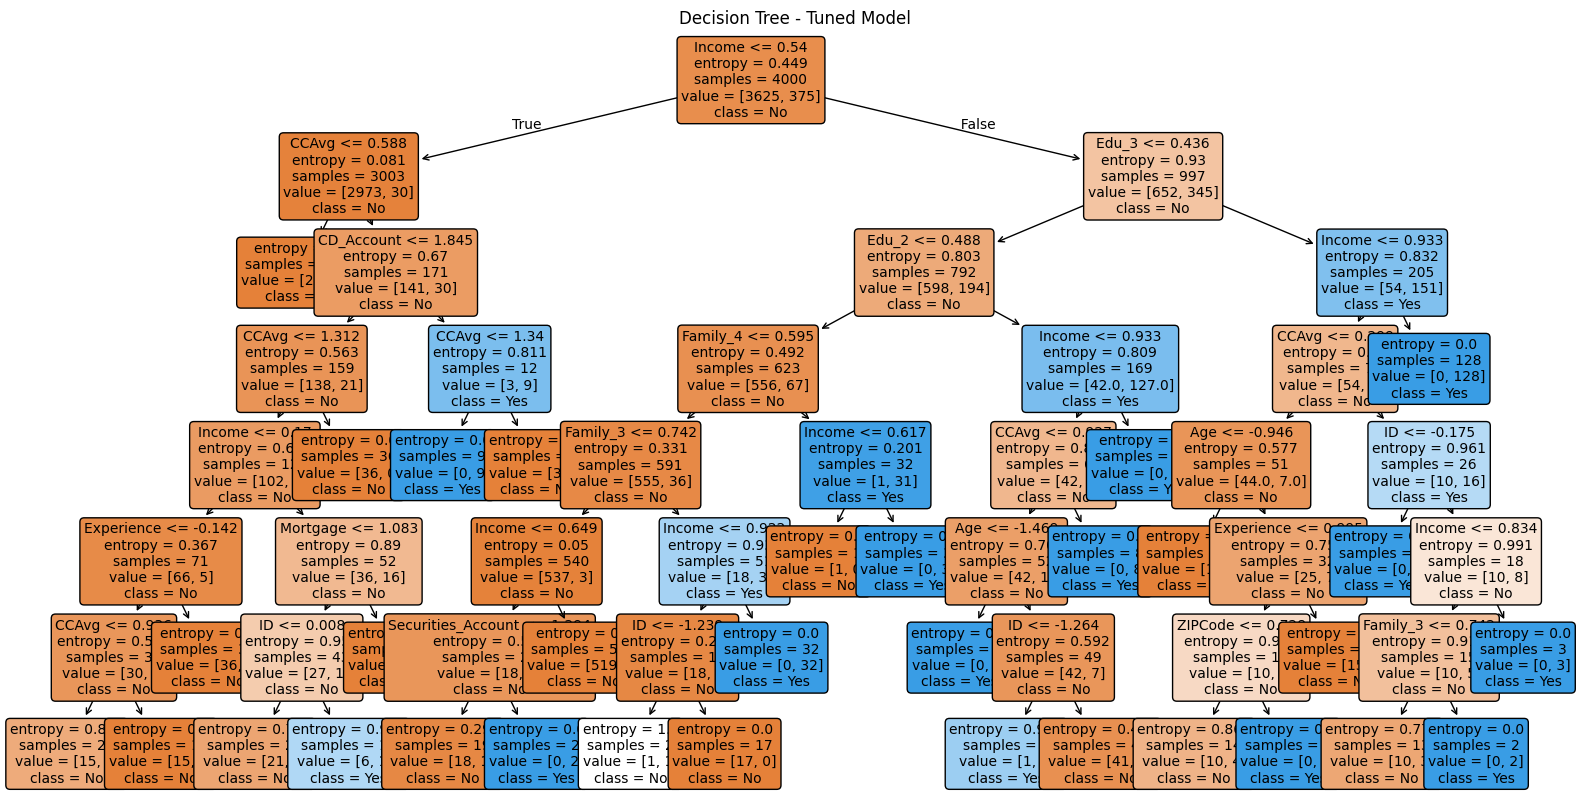

In [39]:
# Used plot_tree() to display the structure of the trained decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title("Decision Tree - Tuned Model")
plt.show()

/tmp/ipython-input-2947934739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


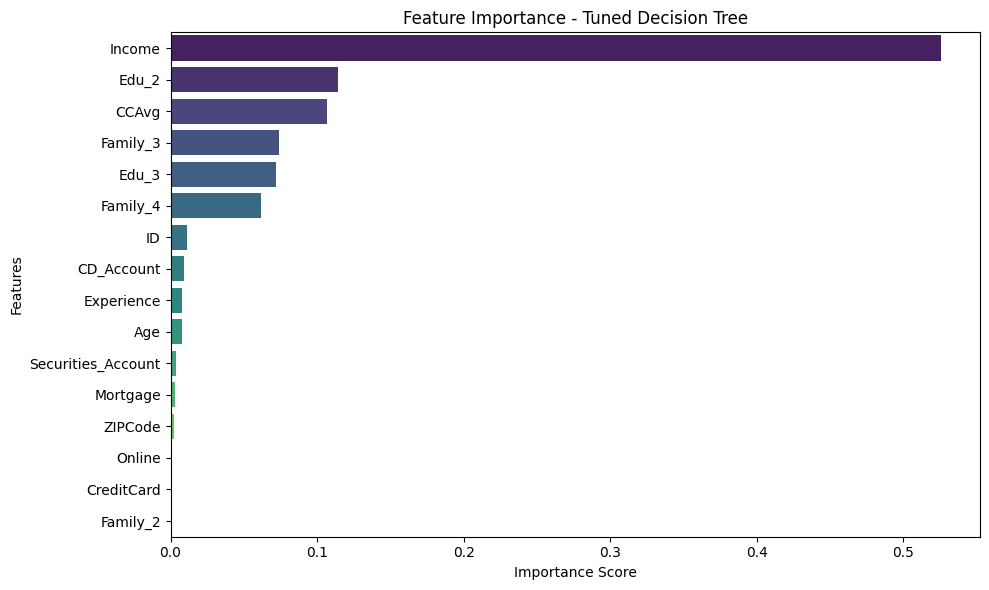

In [40]:
# Plot Feature Importance

import pandas as pd
import seaborn as sns

# Get feature importances
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Feature Importance - Tuned Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

###  Decision Tree Visualization and Feature Importance

#### ✅  Decision Tree Visualization

I used `sklearn.tree.plot_tree()` to visualize the structure of the tuned decision tree. The tree diagram illustrates the decision-making process used by the model to classify whether a customer is likely to accept a personal loan.

Each internal node displays:
- The splitting condition based on a feature (e.g., `Income <= 113.5`)
- The Gini impurity of the node
- The number of samples that reach the node
- The class distribution (No/Yes)
- The predicted class at that node

This visualization helps us:
- Understand how the model combines features to make predictions
- Identify key decision thresholds (e.g., certain income levels or account balances)
- Explain the model’s logic to non-technical stakeholders

#### ✅ Feature Importance Plot

I extracted and plotted the feature importances from the trained decision tree model. The importance scores reflect how much each feature contributed to reducing impurity (i.e., improving classification) across all splits in the tree.

The top features include:
- **Income**: Customers with higher income levels are more likely to accept personal loans.
- **CD Account**: Having a certificate of deposit is a strong indicator of loan acceptance.
- **Education**: Advanced or professional education correlates with higher acceptance likelihood.
- **Age** and **Family**: Older customers and those with larger families show different acceptance patterns.

Less impactful features (with near-zero importance) were automatically deprioritized by the model.

#### ✅: Key Insights and Interpretation

- The decision tree offers **strong interpretability**, making it useful for business decision-making, especially in customer segmentation and targeted marketing.
- **Income** and **CD Account** status emerged as the most influential features — this aligns with practical intuition, as higher financial stability often increases both eligibility and acceptance of loans.
- The model’s ability to break down decisions into a clear sequence of rules allows for:
  - Easy communication with business stakeholders
  - Implementation of rule-based targeting strategies
  - Auditing of loan decision logic for fairness or compliance

> By combining the decision path and feature importance insights, we gain both **predictive power** and **business interpretability**, making the tuned decision tree a highly valuable model for personal loan acceptance prediction.

### Final Model Selection and Recommendation

#### ✅ Model Performance Recap

I evaluated three models using F1 Score as the key metric due to class imbalance (Personal Loan acceptance is less common):

- **Tuned Decision Tree**  
  - F1 Score: **0.92**  
  - Pros: Interpretable, high recall for both classes, easy to explain  
  - Cons: Slight risk of overfitting if not tuned carefully

- **Random Forest**  
  - F1 Score: **0.97**  
  - Pros: Highest accuracy and F1 score, robust to overfitting, handles feature interactions well  
  - Cons: Less interpretable, slower to train and deploy, more resource-intensive

- **Logistic Regression**  
  - F1 Score: **0.84**  
  - Pros: Simple, fast, interpretable coefficients  
  - Cons: Lower performance, assumes linearity, may miss non-linear patterns

#### ✅ Business-Aligned Recommendation



✅ **Tuned Decision Tree** Easy to explain decisions, supports transparent customer targeting |
 **Accuracy & Performance**  ✅ **Random Forest** Best predictive performance, suitable for automation or customer ranking


#### ✅ Final Pick (Recommended)

> I recommend using the **Tuned Decision Tree** model for this project.  
> It balances performance (F1 score = 0.92) with **strong interpretability**, making it ideal for business decision-making, customer communication, and deployment in regulated environments (e.g., finance).



## 📢 Actionable Insights & Recommendations for the Marketing Team  

Based on our decision tree modeling and feature analysis, I offer the following recommendations to guide the personal loan marketing campaign:

---

#### ✅ Key Customer Segments to Target  

1. **High-Income Individuals**  
   - **Insight:** Income was the most important predictor of loan acceptance.  
   - **Action:** Focus marketing efforts on customers earning above key thresholds ( \$90K+), as they show the highest acceptance rates.  
   - **Tactic:** Design personalized offers with higher limits or lower interest rates for affluent segments.  

2. **Customers with a CD Account**  
   - **Insight:** Having a certificate of deposit (CD) is a strong signal of financial stability and interest in long-term savings.  
   - **Action:** Prioritize outreach to CD account holders.  
   - **Tactic:** Offer exclusive loan benefits (e.g., reduced processing fees) to CD customers.  

3. **Highly Educated Customers**  
   - **Insight:** Those with a Master’s or Doctorate are more likely to accept personal loans.  
   - **Action:** Segment based on education level if available in CRM data.  
   - **Tactic:** Position loans as flexible tools for career, business, or relocation goals — appealing to this audience's life stage.  

4. **Older Customers with Larger Families**  
   - **Insight:** Family size and age were moderate but relevant predictors.  
   - **Action:** Consider family-oriented messaging — for example, loans for family vacations, tuition, or home renovations.  
   - **Tactic:** Use life-stage marketing to connect emotionally.  

---

#### ✅ Strategic Targeting & Campaign Design  

- **Behavior-Driven Targeting**  
  Leverage the decision rules to build transparent, rules-based segments:
  - Example: "Customers with Income > \$113.5K and no CD account → Medium likelihood"
  - Enables tiered targeting (high / medium / low probability groups)

- **Email & Digital Campaign Personalization**  
  - Include tailored copy based on decision tree paths  
  - For example:
    - Subject: “You’re Pre-Qualified — Because You’ve Been Saving Smart!”
    - Segment: CD account holders + mid-income  

- **Ethical & Transparent Marketing**  
  - Use interpretable models like Decision Trees to justify eligibility logic  
  - Document decision rules clearly for compliance and transparency  

---

#### ✅ Model-Aided Business Applications  

- **Customer Communication**  
  - Decision trees help explain **why** a customer was offered a loan — useful for call center scripts or chatbot training  

- **Risk Management**  
  - Predict which segments are more likely to accept vs. decline — helpful in aligning budget, staff, and channel priorities  

- **Regulatory Compliance**  
  - In finance, using interpretable models helps with audits and legal scrutiny (e.g., why someone was denied an offer)  

---

### 🏁 Final Advice to the Marketing Team  

To maximize the ROI of the loan campaign:

- 🎯 **Focus on income, CD account status, and education** for primary targeting  
- 🤖 Use **interpretable decision trees** to design logic-based campaigns with measurable segments  
- 💬 Ensure **marketing copy and messaging aligns with decision paths** (e.g., savings-oriented benefits for CD holders)  
- 📈 **Pilot A/B campaigns** using model-selected vs. random segments to measure uplift  

## Conclusion and Business Recommendations


🎯 **Executive Summary:**  
The tuned Decision Tree model highlights **income, CD account status, education, and age/family size** as the top predictors of loan acceptance. These features can drive **targeted, explainable marketing strategies**.

---

### 🔍 Key Customer Segments to Prioritize

- **High-Income Customers**
  - Income is the strongest feature in predicting loan acceptance.
  - Prioritize customers above key income thresholds (e.g., $90K–$113.5K).
  - Personalize loan offers by income band and repayment flexibility.

- **CD Account Holders**
  - Customers with CD accounts are far more likely to accept personal loans.
  - Offer tailored promotions for CD holders with language like “You’ve built savings — now unlock value.”

- **Educated Individuals**
  - Advanced education correlates with higher acceptance.
  - Position loans for life-stage needs (career, relocation, home improvement).

- **Older Adults & Larger Families**
  - Older individuals and those with more dependents show higher acceptance.
  - Emphasize security, planning, and family-centered use cases.

---

### 📈 Strategic Marketing Recommendations

- **Segment Using Decision Rules**
  - Example: `Income > 113.5 & CD Account = Yes` → High-likelihood segment.
  - Use decision paths directly in CRM/audience filters.

- **Message Personalization**
  - High-income: “Finance your goals with a flexible, high-limit loan.”
  - CD holders: “Unlock premium loan offers for trusted savers.”
  - Families: “Your family deserves the best — and the support to achieve it.”

- **Transparent Targeting**
  - Easy to explain criteria for internal teams and regulators.
  - Minimizes risk of bias or legal challenge.

---

### 🧠 Business Benefits

- **Interpretability**
  - Models like decision trees offer rule-based segmentation and compliance visibility.
  - Teams can validate targeting logic with business stakeholders.

- **Operationalization**
  - Model insights are actionable: segment, target, and optimize.
  - Supports low-code/no-code deployment in marketing automation tools.

---
